## ANALISIS EXPLORATORIO DE DATOS (EDA)

In [1]:
#Importamos las librerías que utilizaremos a lo largo de este notebook
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from wordcloud import WordCloud
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

Importamos los datasets limpios, a partir de los csv generados durante el ETL, realizamos las modificaciones necesarias.

In [2]:
#Importamos el dataset games
df_games=pd.read_csv('Data/games.csv')

In [3]:
#Recordamos como estaba compuesto el dataset games
df_games.head()

,genres,title,id,release_year
0,Action,Lost Summoner Kitty,761140,2018
1,Casual,Lost Summoner Kitty,761140,2018
2,Indie,Lost Summoner Kitty,761140,2018
3,Simulation,Lost Summoner Kitty,761140,2018
4,Strategy,Lost Summoner Kitty,761140,2018


In [4]:
#Importamos el dataset reviews
df_reviews=pd.read_csv('Data/reviews.csv')

In [5]:
#Recordamos como estaba compuesto el dataset reviews
df_reviews.head()

,user_id,item_id,recommend,year_review,sentimiento
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,2
2,76561197970982479,43110,True,2011,2
3,js41637,251610,True,2014,2
4,js41637,227300,True,2013,0


In [6]:
#Importamos el dataset items
df_items=pd.read_csv('Data/items.csv')

In [7]:
#Recordamos como estaba compuesto el dataset items
df_items.head()

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6
1,76561197970982479,30,Day of Defeat,7
2,76561197970982479,300,Day of Defeat: Source,4733
3,76561197970982479,240,Counter-Strike: Source,1853
4,76561197970982479,3830,Psychonauts,333


## 1) Análisis de juegos e items

Primero, prepararemos los datos para nuestro análisis. En una primera instancia, haremos un merge con los datasets df_games y df_items.

In [8]:
#Hacemos el merge entre los datasets
df_games_items=pd.merge(df_games,df_items, left_on='id', right_on='item_id', how='inner')

In [9]:
#Observamos como nos queda el dataframe
df_games_items.head()

,genres,title,id,release_year,user_id,item_id,item_name,playtime_forever
0,Action,Carmageddon Max Pack,282010,1997,UTNerd24,282010,Carmageddon Max Pack,5
1,Action,Carmageddon Max Pack,282010,1997,saint556,282010,Carmageddon Max Pack,13
2,Action,Carmageddon Max Pack,282010,1997,chidvd,282010,Carmageddon Max Pack,110
3,Action,Carmageddon Max Pack,282010,1997,aerpub,282010,Carmageddon Max Pack,13
4,Action,Carmageddon Max Pack,282010,1997,lucifer666678,282010,Carmageddon Max Pack,8


In [10]:
#Vemos la información del dataset
df_games_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6887157 entries, 0 to 6887156
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   genres            object
 1   title             object
 2   id                int64 
 3   release_year      int64 
 4   user_id           object
 5   item_id           int64 
 6   item_name         object
 7   playtime_forever  int64 
dtypes: int64(4), object(4)
memory usage: 420.4+ MB


In [11]:
#Analizamos si hay nulos
df_games_items.isnull().sum()

genres              0
title               0
id                  0
release_year        0
user_id             0
item_id             0
item_name           0
playtime_forever    0
dtype: int64

Al ver que no hay valores nulos, podemos comenzar con nuestro análisis.

### 1.1) Cantidad de juegos lanzados por año

Queremos ver también cuáles son los años donde hay mayor lanzamiento de juegos

In [12]:
#Contamos los lanzamientos por año
releases_year=df_games_items["release_year"].value_counts().sort_values(ascending=True)

In [13]:
releases_year

release_year
1984         39
1987         52
1991        101
1989        105
2018        107
1983        216
1992        290
1990        536
1988        959
1993       1243
1996       1816
1994       1841
1995       3150
1997       7733
2002      10850
2001      11088
1998      11561
2000      13107
1999      22155
2005      42647
2003      47963
2004      58231
2007      74978
2008      89504
2006     185887
2009     217267
2010     331924
2017     425482
2016     502318
2011     675006
2012     946798
2013    1051576
2014    1062213
2015    1088414
Name: count, dtype: int64

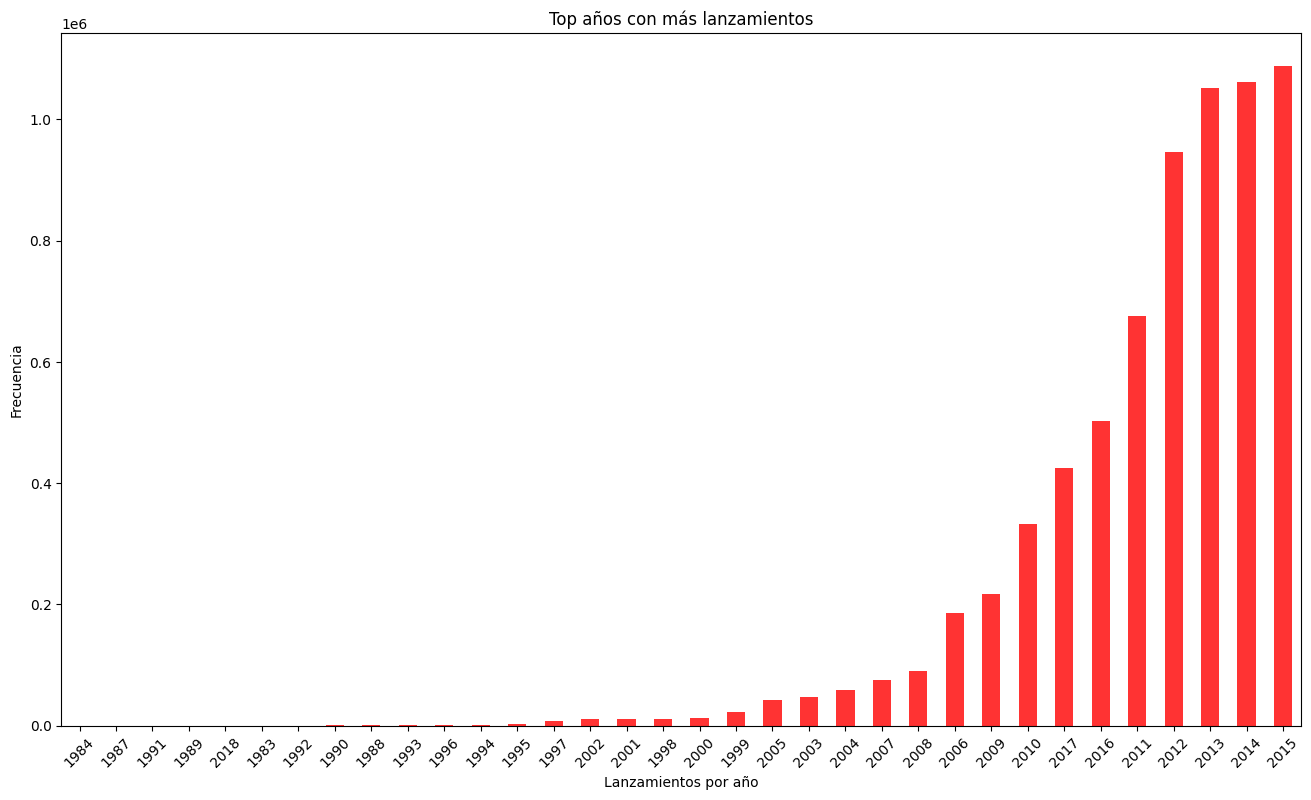

In [14]:
#Graficamos los top años con más lanzamientos
releases_year.plot(kind='bar', figsize=(16,9), title="Top años con más lanzamientos",color='#ff3333' )
plt.xlabel('Lanzamientos por año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Podemos concluir que efectivamente, la empresa ha ido aumentando con el paso del tiempo la cantidad de juegos que lanzan por año. Esto puede evidenciarse a través de un crecimiento gradual a medida que pasan los años que se muestra en el gráfico anterior.

### 1.1) Horas de juego por cada género

Vamos a comenzar por analizar los géneros. Queremos conocer los géneros con más horas de juego.

In [15]:
#Del dataframe armado, solo nos quedaremos con las columnas genres y playtime_forever.
df_generos_playtime=df_games_items[['genres','playtime_forever']]

In [16]:
#Verificamos la selección de columnas
df_generos_playtime.head()

,genres,playtime_forever
0,Action,5
1,Action,13
2,Action,110
3,Action,13
4,Action,8


In [17]:
#Agrupamos de manera de obtener los tiempos de juego para cada genero
df_generos_playtime=df_generos_playtime.groupby('genres')['playtime_forever'].sum()

In [18]:
#Ordenamos los valores en orden descendente
generos_playtime=df_generos_playtime.sort_values(ascending=False)

In [19]:
#Verificamos el orden de los valores
generos_playtime

genres
Action                       3103440724
Indie                        1494135572
RPG                          1037591959
Adventure                     907307069
Simulation                    867387040
Strategy                      659039899
Free to Play                  597276958
Massively Multiplayer         443653637
Casual                        249093309
Early Access                  158689269
Sports                         65844561
Racing                         62655485
Utilities                       4496148
Design &amp; Illustration       4102258
Web Publishing                  2780605
Video Production                2408892
Animation &amp; Modeling        2007347
Software Training                571032
Audio Production                 556002
Education                        415556
Photo Editing                    115425
Name: playtime_forever, dtype: int64

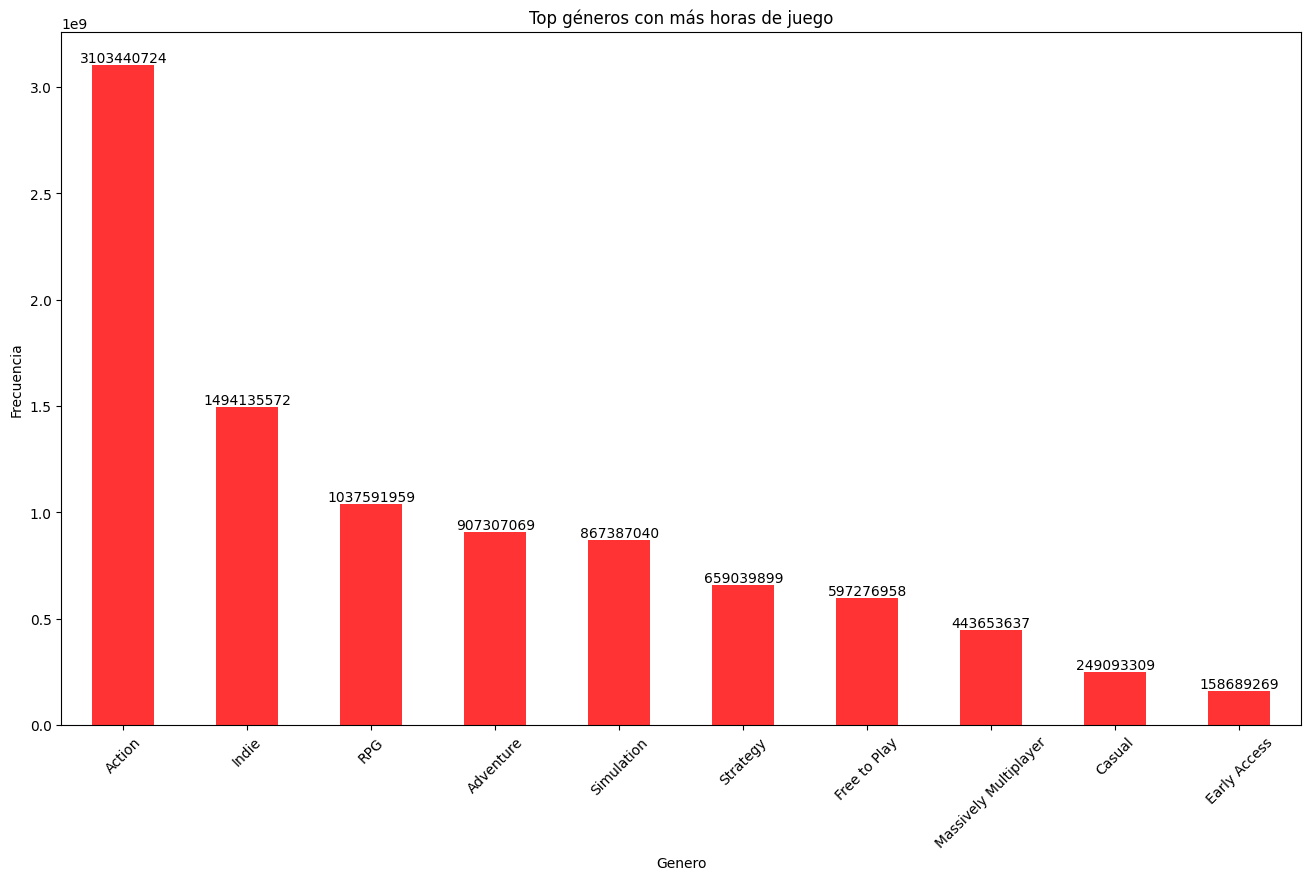

In [20]:
#Hacemos un gráfico de barras de los top géneros con más juegos
generos_playtime.head(10).plot(kind='bar', figsize=(16,9), title="Top géneros con más horas de juego", color='#ff3333')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
for i, valor in enumerate(generos_playtime.head(10)):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')
plt.show()

Podemos concluir que los géneros con más horas de juego con Action, Indice y RPG.

### 1.2) Cantidad de juegos por género

Queremos analizar ahora, la cantidad de juegos que hay en cada una de las categorías, para ver las categorías más populares.

In [21]:
df_generos_items=df_games_items[['genres','title']]

In [22]:
df_generos_items

,genres,title
0,Action,Carmageddon Max Pack
1,Action,Carmageddon Max Pack
2,Action,Carmageddon Max Pack
3,Action,Carmageddon Max Pack
4,Action,Carmageddon Max Pack
...,...,...
6887152,Action,Counter-Strike: Condition Zero
6887153,Action,Counter-Strike: Condition Zero
6887154,Action,Counter-Strike: Condition Zero
6887155,Action,Counter-Strike: Condition Zero


Eliminamos los duplicados, solamente queremos contar una única vez los titulos en cada género

In [23]:
#Eliminamos los duplicados
df_generos_items=df_generos_items.drop_duplicates()

In [24]:
#Contamos los géneros
count_genres=df_generos_items['genres'].value_counts()

In [25]:
#Verificamos el conteo
count_genres

genres
Indie                        4939
Action                       3610
Adventure                    2776
Casual                       2117
Strategy                     1853
RPG                          1462
Simulation                   1252
Free to Play                  457
Early Access                  448
Racing                        311
Sports                        283
Massively Multiplayer         235
Utilities                      70
Design &amp; Illustration      52
Animation &amp; Modeling       41
Education                      26
Software Training              26
Video Production               22
Web Publishing                 16
Photo Editing                  14
Audio Production               13
Name: count, dtype: int64

Procedemos a graficar los géneros con más juegos

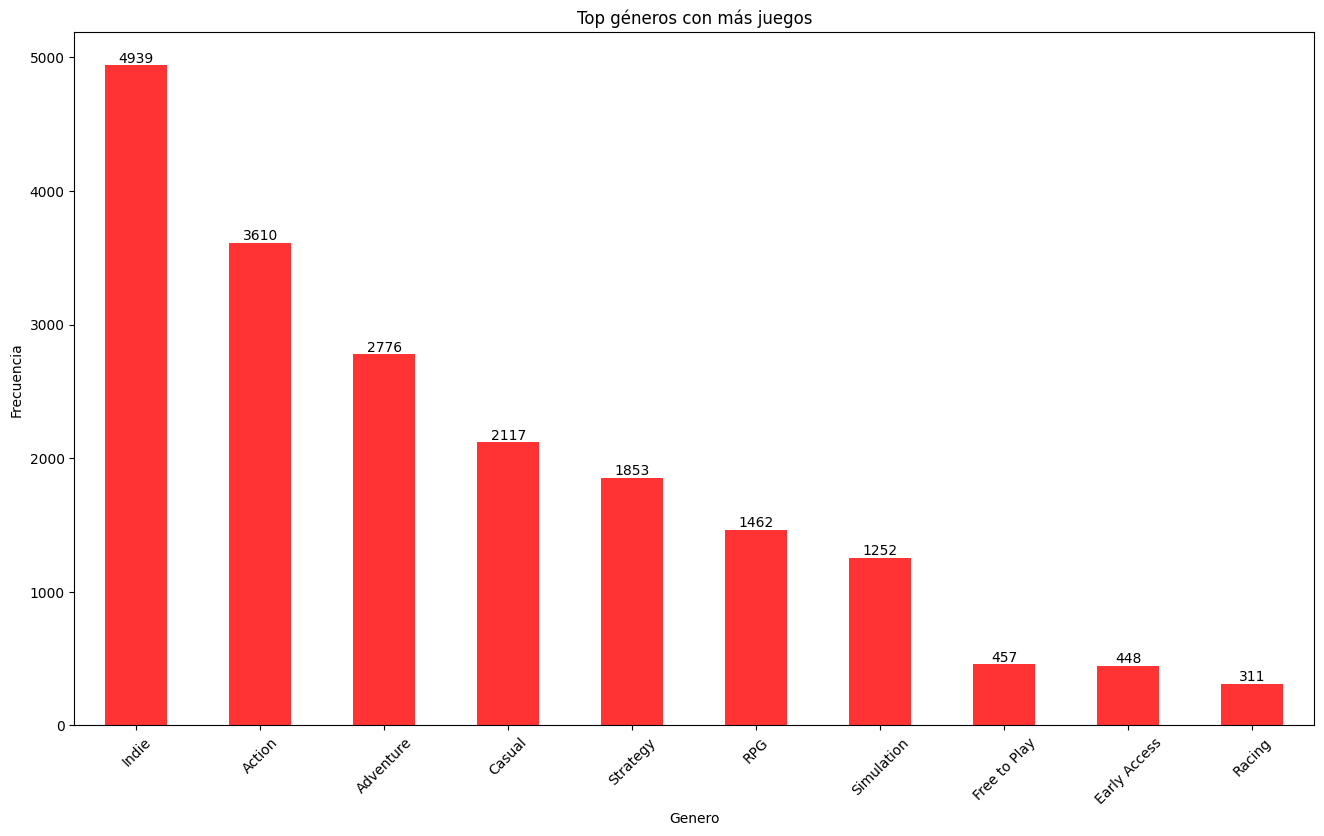

In [26]:
#Hacemos un gráfico de barras de los top géneros con más juegos
count_genres.head(10).plot(kind='bar', figsize=(16,9), title="Top géneros con más juegos", color='#ff3333')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
for i, valor in enumerate(count_genres.head(10)):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')
plt.show()

Vamos además hacer un wordcloud para ver los géneros con mayor cantidad de juegos

In [27]:
wordcloud = WordCloud(width = 600, height = 300, background_color = "#ff3333").generate_from_frequencies(count_genres)

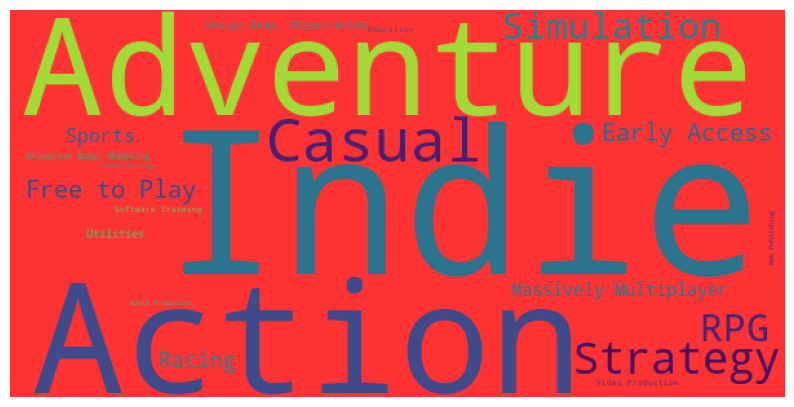

In [28]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Podemos concluir tanto del wordcloud como del gráfico de barras que las categorías más populares (o con mayor número de items) son: Indie, Action y Adventure

### Horas de juego por cada item

In [29]:
df_playtime_item=df_games_items[['item_name', 'playtime_forever']]

In [30]:
df_playtime_item

,item_name,playtime_forever
0,Carmageddon Max Pack,5
1,Carmageddon Max Pack,13
2,Carmageddon Max Pack,110
3,Carmageddon Max Pack,13
4,Carmageddon Max Pack,8
...,...,...
6887152,Counter-Strike: Condition Zero,203
6887153,Counter-Strike: Condition Zero,244
6887154,Counter-Strike: Condition Zero,7
6887155,Counter-Strike: Condition Zero,9


In [31]:
playtime_item = df_playtime_item.groupby('item_name')['playtime_forever'].sum()

In [32]:
playtime_item=playtime_item.sort_values(ascending=False)

In [33]:
playtime_item

item_name
Garry's Mod                                  896733232
Counter-Strike: Global Offensive             785184267
Terraria                                     619898164
Rust                                         486722496
Unturned                                     254769805
                                               ...    
CyberLink PowerDVD 16 Ultra                          1
Mission Runway                                       1
Xcinerator                                           1
3D Sprite Renderer and Convex Hull Editor            1
Actual Multiple Monitors                             1
Name: playtime_forever, Length: 8070, dtype: int64

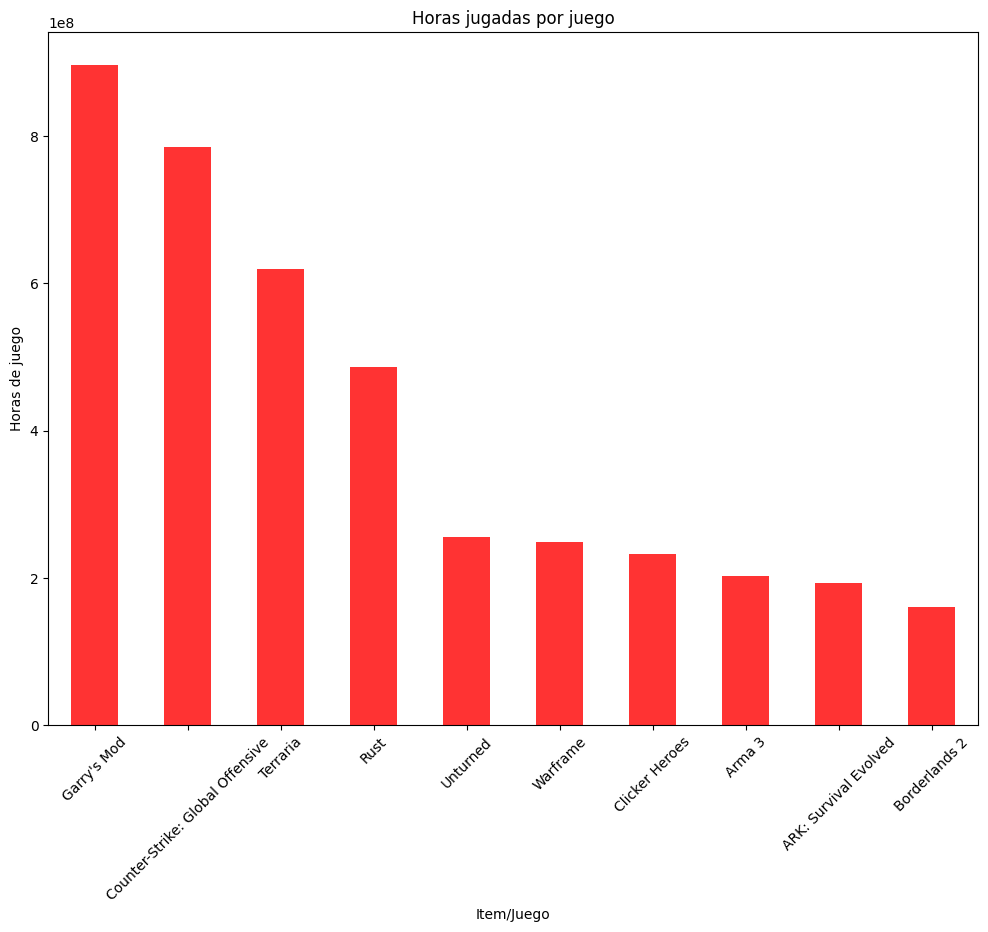

In [34]:
playtime_item.head(10).plot(kind='bar', figsize=(12,9), title="Horas jugadas por juego", color='#ff3333')
plt.xlabel('Item/Juego')
plt.ylabel('Horas de juego')
plt.xticks(rotation=45)
plt.show()

Podemos observar que los juegos más populares son: Garry's Mod, Counter-Strike: Global Offensiva y Terraria.

## 2) Análisis de las reviews 

Para este sección, crearemos un dataframe, haciendo un merge entre los datasets df_games y df_reviews

### 2.1) Análisis de las recomendaciones

Analizaremos en función de las recomendaciones de los usuarios, qué porcentaje resultaron en una recomendación y cuales no.

In [35]:
df_recomendaciones=pd.merge(df_games, df_reviews, left_on='id', right_on='item_id', how='inner')

In [36]:
df_recomendaciones=df_recomendaciones[['title', 'recommend', 'sentimiento']]

In [37]:
df_recomendaciones

,title,recommend,sentimiento
0,Half-Life,True,0
1,Half-Life,True,0
2,Half-Life,True,0
3,Half-Life,True,2
4,Half-Life,True,0
...,...,...,...
103241,Counter-Strike: Condition Zero,False,1
103242,Counter-Strike: Condition Zero,True,2
103243,Counter-Strike: Condition Zero,True,2
103244,Counter-Strike: Condition Zero,True,1


In [38]:
recommend_count=df_recomendaciones['recommend'].value_counts()

In [39]:
recommend_count

recommend
True     92737
False    10509
Name: count, dtype: int64

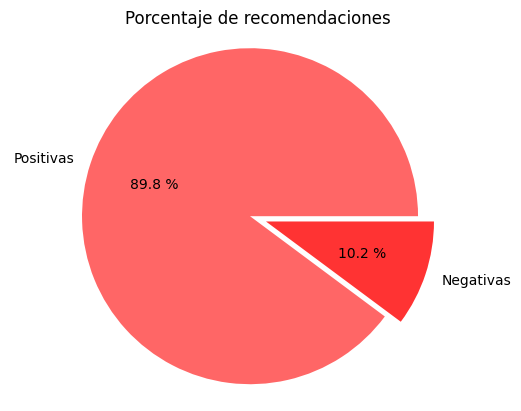

In [40]:
colores=['#ff6666','#ff3333']
etiquetas=['True,False']
desfase = (0, 0.1)
labels=['Positivas','Negativas']
plt.pie(recommend_count, explode=desfase, colors=colores,autopct="%0.1f %%", labels=labels)
plt.title('Porcentaje de recomendaciones')
plt.axis("equal")
plt.show()

En función de las recomendaciones de los usuarios, se muestran las recomendaciones que resultaron positivas (True) y las que resultaron negativas (False), de esta manera la información se representa en porcentaje y a través de un gráfico circular.

### 2.2) Análisis de los sentimientos (provenientes del sentiment_analysis de las reviews)

Se analiza además, en función del sentiment analyzer realizado en el ETL qué porcentaje resultó en un sentimiento positivo (2), un sentimiento neutral (1) y un sentimiento negativo (0)

In [41]:
sentiment_counts = df_reviews['sentimiento'].value_counts()
sentiment_counts 

sentimiento
2    28154
1    10698
0    10310
Name: count, dtype: int64

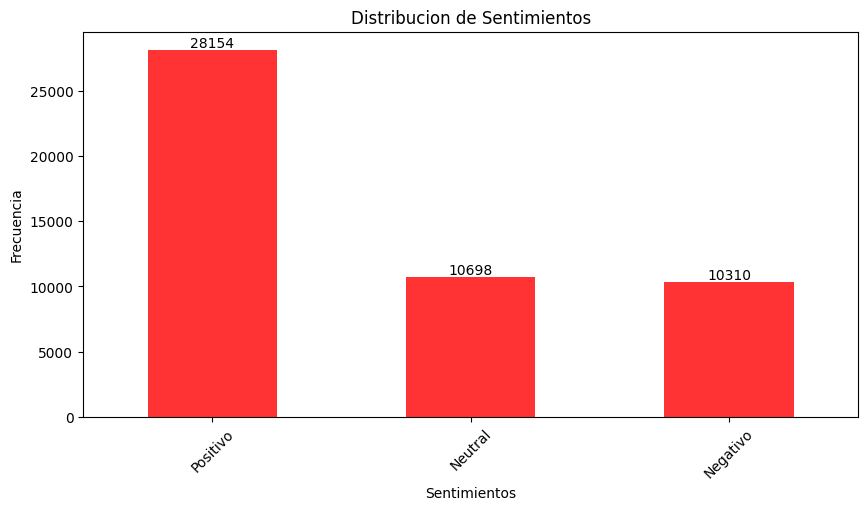

In [42]:
categorias=['Positivo','Neutral','Negativo']
sentiment_counts.plot(kind="bar", figsize=(10,5), color='#ff3333')
plt.title("Distribucion de Sentimientos")
plt.xlabel('Sentimientos')
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
for i, valor in enumerate(sentiment_counts):
    plt.text(i, valor + 1, str(valor), ha='center', va='bottom')
axes.Axes.set_xticklabels(plt.gca(), categorias)
plt.show()

Podemos concluir que en la mayoría de los casos, el sentimiento de las review positivo resultó altamente superior a los casos neutrales y negativos. <br>
Los valores positivos representan el 57%, los valores neutrales un 22% y los negativos un 21%

## Modelo de Machine Learning

 La propuesta para el sistema de recomendación es aplicar un modelo que deberá tener una relación ítem-ítem, esto es se toma un item, en base a que tan similar esa ese ítem al resto, se recomiendan similares. Aquí el input es un juego y el output es una lista de juegos recomendados, para ello recomendamos aplicar la similitud del coseno


def recomendacion_usuario( id de usuario ): Ingresando el id de un usuario, deberíamos recibir una lista con 5 juegos recomendados para dicho usuario.

In [43]:
#Del dataframe df_games solo tomamos las columnas que necesitamos
df_base=df_games[['genres','title','id']]

In [44]:
#Verificamos como nos queda el dataframe
df_base.head()

,genres,title,id
0,Action,Lost Summoner Kitty,761140
1,Casual,Lost Summoner Kitty,761140
2,Indie,Lost Summoner Kitty,761140
3,Simulation,Lost Summoner Kitty,761140
4,Strategy,Lost Summoner Kitty,761140


In [45]:
#Eliminamos los duplicados
df_base=df_base.drop_duplicates()

Durante el proceso de ETL, se separaron las columnas genres que venían en una lista. En este caso, y como ya se hizo todo el ETL, se procede a volver a agrupar las columnas para luego facilitar el proceso de armado de la matriz.

In [46]:
#Por cada titulo, seleccionamos los generos a los que pertenece
df = df_base.groupby(['title'])['genres'].agg(list).reset_index()

In [47]:
#Agrupamos nuevamente con la columna id
df['id'] = df_base.groupby('title')['id'].first().values

In [48]:
#Verificamos nuestro dataframe
df

,title,genres,id
0,! That Bastard Is Trying To Steal Our Gold !,"[Action, Adventure, Casual, Indie]",449940
1,"""Barely Attuned Magic Thingy"" Staff","[Action, Free to Play, Indie, Massively Multip...",308163
2,"""Glow Ball"" - The billiard puzzle game","[Casual, Indie, Sports, Strategy]",388390
3,"""Just Another Day"" - Seduce Me Otome CD","[Casual, Simulation]",454790
4,"""Lethargic Sentience"" Wand","[Action, Free to Play, Indie, Massively Multip...",308164
...,...,...,...
28520,（尘沙惑设定集）Lost in Secular Love - Concept Design ...,"[Adventure, Casual, Indie, Simulation]",541220
28521,４人打ちアクション麻雀 / ACTION MAHJONG,"[Action, Casual, Indie, Early Access]",575810
28522,＜/reality＞,"[Adventure, Indie]",562280
28523,＜/reality＞ Original Soundtrack,"[Adventure, Indie]",626850


In [49]:
#Ahora que tenemos en una misma columna los generos, los separaré en base a la coma.
df['genres'] = df['genres'].apply(lambda x: ','.join(x))

In [50]:
#Verificamos
df.head()

,title,genres,id
0,! That Bastard Is Trying To Steal Our Gold !,"Action,Adventure,Casual,Indie",449940
1,"""Barely Attuned Magic Thingy"" Staff","Action,Free to Play,Indie,Massively Multiplaye...",308163
2,"""Glow Ball"" - The billiard puzzle game","Casual,Indie,Sports,Strategy",388390
3,"""Just Another Day"" - Seduce Me Otome CD","Casual,Simulation",454790
4,"""Lethargic Sentience"" Wand","Action,Free to Play,Indie,Massively Multiplaye...",308164


In [51]:
#Obtenemos las variables dummies
genres_dummies = df['genres'].str.get_dummies(',')

In [52]:
#Observamos como muestran las variables dummies para cada género
genres_dummies

,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28520,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28521,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
28522,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28523,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Concatenamos con las columnas id y título
df1 = pd.concat([df['id'],df['title'], genres_dummies], axis=1)

In [54]:
#Verificamos como nos queda el df
df1.head()

,id,title,Accounting,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
0,449940,! That Bastard Is Trying To Steal Our Gold !,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,308163,"""Barely Attuned Magic Thingy"" Staff",0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,388390,"""Glow Ball"" - The billiard puzzle game",0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,454790,"""Just Another Day"" - Seduce Me Otome CD",0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,308164,"""Lethargic Sentience"" Wand",0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


Hasta este momento, contamos con un dataframe que posee 28525 filas x 22 columnas, vamos a adoptar algunos criterios que me permitan acotar mi modelo. Para ello, optaré por seleccionar los géneros con más items.

In [55]:
#Seleccionamos los géneros de mi dataframe
generos=df_games['genres']

In [56]:
#Contamos las veces que aparecen los géneros
conteo_generos=Counter(generos)

In [57]:
#Mostramos las variables
conteo_generos

Counter({'Action': 11179,
         'Casual': 8211,
         'Indie': 15634,
         'Simulation': 6648,
         'Strategy': 6893,
         'Free to Play': 2013,
         'RPG': 5412,
         'Sports': 1245,
         'Adventure': 8112,
         'Racing': 1077,
         'Massively Multiplayer': 1096,
         'Early Access': 1419,
         'Animation &amp; Modeling': 183,
         'Video Production': 114,
         'Web Publishing': 268,
         'Education': 125,
         'Software Training': 105,
         'Utilities': 335,
         'Design &amp; Illustration': 460,
         'Audio Production': 91,
         'Photo Editing': 77,
         'Accounting': 7})

In [58]:
#Imprimimos los valores de la lista de generos, y le sumo las 2 columnas anteiores
generos = [valor for valor, _ in conteo_generos.most_common(9)]
generos.insert(0,'id')
generos.insert(1,'title')
generos

['id',
 'title',
 'Indie',
 'Action',
 'Casual',
 'Adventure',
 'Strategy',
 'Simulation',
 'RPG',
 'Free to Play',
 'Early Access']

In [59]:
#Ahora filtro mi dataframe considerando unicamente los top generos
df1=df1[generos]

In [60]:
#Observamos como nos va a quedar el datagrame
df1.head()

,id,title,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access
0,449940,! That Bastard Is Trying To Steal Our Gold !,1,1,1,1,0,0,0,0,0
1,308163,"""Barely Attuned Magic Thingy"" Staff",1,1,0,0,0,0,1,1,0
2,388390,"""Glow Ball"" - The billiard puzzle game",1,0,1,0,1,0,0,0,0
3,454790,"""Just Another Day"" - Seduce Me Otome CD",0,0,1,0,0,1,0,0,0
4,308164,"""Lethargic Sentience"" Wand",1,1,0,0,0,0,1,1,0


Ahora, vamos a filtrar los juegos, considerando los primeros 100 juegos que fueron jugados más horas.

In [61]:
#Filtramos el dataframe en función de los titulos y las horas de juego
df_juegos=df_games_items[['title','playtime_forever']]

In [62]:
#Observamos como nos queda el dataframe
df_juegos.head()

,title,playtime_forever
0,Carmageddon Max Pack,5
1,Carmageddon Max Pack,13
2,Carmageddon Max Pack,110
3,Carmageddon Max Pack,13
4,Carmageddon Max Pack,8


In [63]:
#Primero, definimos una agrupación, en la que para cada titulo me sume los playtime, y me resetee el índice.
playtime_item = df_juegos.groupby('title')['playtime_forever'].sum().reset_index()

In [64]:
#Ordenamos los valores de mayor a menor en función del tiempo de juego
playtime_item=playtime_item.sort_values(by='playtime_forever', ascending=False)

In [65]:
#Revisamos nuestro dataset
playtime_item

,title,playtime_forever
2847,Garry's Mod,896733232
1491,Counter-Strike: Global Offensive,785184267
6729,Terraria,619898164
5688,Rust,486722496
7491,Unturned,254769805
...,...,...
285,Age of Empires II HD: The African Kingdoms,1
6216,Space Galaxy - Graphics Pack,1
680,Back To Life 3,1
3435,Indie Graphics Bundle - Royalty Free Sprites,1


De los 8071 juegos de los generos más importantes, vamos a elegir los 100 con más horas jugadas por tomar un criterio.

In [66]:
#Seleccionamos ahora los 100 títulos con más horas de juego
playtime_item=playtime_item['title'].head(100)

In [67]:
#Convertimos los valores a lista
playtime_item=playtime_item.to_list()

In [68]:
#Observamos como nos queda la lista
playtime_item

["Garry's Mod",
 'Counter-Strike: Global Offensive',
 'Terraria',
 'Rust',
 'Unturned',
 'Warframe',
 'Clicker Heroes',
 'Arma 3',
 'ARK: Survival Evolved',
 'Borderlands 2',
 'DayZ',
 'Rocket League®',
 'Starbound',
 'Robocraft',
 'PlanetSide 2',
 'Arma 2: Operation Arrowhead',
 'Grand Theft Auto V',
 'Counter-Strike: Source',
 'Trove',
 'Spiral Knights',
 'Left 4 Dead 2',
 'Realm of the Mad God',
 "Sid Meier's Civilization® V",
 'Mount &amp; Blade: Warband',
 'Fallout: New Vegas',
 'The Binding of Isaac',
 'Dungeon Defenders',
 'Heroes &amp; Generals',
 'Portal 2',
 'TERA',
 'AdVenture Capitalist',
 'Fallout 4',
 'APB Reloaded',
 'Awesomenauts - the 2D moba',
 'Chivalry: Medieval Warfare',
 'Torchlight II',
 'Castle Crashers®',
 'FTL: Faster Than Light',
 'Insurgency',
 'Neverwinter',
 'Kerbal Space Program',
 'Elsword',
 'Killing Floor',
 'Crusader Kings II',
 'The Forest',
 "Don't Starve Together",
 'Europa Universalis IV',
 'DARK SOULS™: Prepare To Die™ Edition',
 'EVE Online',
 '

In [69]:
#Filtramos nuestra matriz en función de los títulos seleccionados
df1 = df1[df1['title'].isin(playtime_item)].reset_index()

In [70]:
#Imprimimos
df1

,index,id,title,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access
0,483,113400,APB Reloaded,0,1,0,0,0,0,0,1,0
1,502,346110,ARK: Survival Evolved,1,1,0,1,0,0,1,0,0
2,607,224540,Ace of Spades: Battle Builder,1,1,0,0,0,0,0,0,0
3,659,346900,AdVenture Capitalist,1,0,1,0,0,0,0,1,0
4,802,221380,Age of Empires II HD,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,25980,304050,Trove,0,1,1,1,0,0,1,1,0
96,26346,304930,Unturned,1,1,1,1,0,0,0,1,0
97,26617,212160,Vindictus,0,1,0,1,0,0,1,1,0
98,26949,230410,Warframe,0,1,0,0,0,0,0,1,0


In [71]:
#Eliminamos la columna index
df_ml=df1.drop(columns='index')

In [72]:
#Imprimimos el df que usaremos para nuestro modelo
df_ml

,id,title,Indie,Action,Casual,Adventure,Strategy,Simulation,RPG,Free to Play,Early Access
0,113400,APB Reloaded,0,1,0,0,0,0,0,1,0
1,346110,ARK: Survival Evolved,1,1,0,1,0,0,1,0,0
2,224540,Ace of Spades: Battle Builder,1,1,0,0,0,0,0,0,0
3,346900,AdVenture Capitalist,1,0,1,0,0,0,0,1,0
4,221380,Age of Empires II HD,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,304050,Trove,0,1,1,1,0,0,1,1,0
96,304930,Unturned,1,1,1,1,0,0,0,1,0
97,212160,Vindictus,0,1,0,1,0,0,1,1,0
98,230410,Warframe,0,1,0,0,0,0,0,1,0


In [73]:
df_ml.to_csv('Data/modelo_ml.csv', index=False)

Ahora que ya tenemos los datos, es importante armar la función pedida. Para ello utilizando un sistema de recomendación para aplicar un modelo de relación item-item.

In [74]:
def recomendar_juegos(id_juego: int):

    '''
    Ingresando el id del juego, deberíamos recibir una lista con 5 juegos recomendados similares al ingresado.
    
    '''
    
    if id_juego not in df_ml['id'].values:
        return "El id ingresado no se encuentra en la base de datos."

    # Encuentra el índice del juego en la matriz de similitud
    juego_index = df_ml[df_ml['id'] == id_juego].index[0]

    # Selecciona las columnas relevantes (las que contienen 0 y 1 para géneros)
    columnas_generos = df_ml.columns[2:]

    # Calcula la similitud de coseno entre juegos basada en las características de género (item a item)
    similarity_matrix = cosine_similarity(df_ml[columnas_generos].T)

    # Obtén los juegos más similares (excluyendo el juego en sí mismo)
    similar_juegos_indices = similarity_matrix[juego_index].argsort()[::-1][1:]

    # Obtén los títulos de los juegos recomendados (los primeros 5)
    juegos_recomendados = df_ml['title'].iloc[similar_juegos_indices[:5]].values.tolist()

    return juegos_recomendados

In [75]:
recomendar_juegos(113400)

['ARK: Survival Evolved',
 'AirMech Strike',
 'AdVenture Capitalist',
 'Ace of Spades: Battle Builder',
 'Arma 2: Operation Arrowhead']